In [15]:
# This cell imports the necessary libraries to implemetn thte models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("/content/quantvision_financial_dataset_200.csv")
print(data)
print(data.info())
print(data.isnull().sum())

     lookback_days asset_type market_regime  high_volatility  \
0               48     equity       bullish                0   
1               38      index       bullish                1   
2               24     equity       bullish                1   
3               52     equity       bullish                0   
4               17     equity       bullish                1   
..             ...        ...           ...              ...   
195             48      index       bullish                1   
196             15     equity       bullish                1   
197             17      index       bullish                1   
198             36     equity       bullish                1   
199             18      index       bearish                1   

     trend_continuation  technical_score  edge_density  slope_strength  \
0                     1            59.99         0.504           0.298   
1                     1            78.54         0.559           0.037   
2        

In [4]:
# This cell implements a logistic regression model which is one of the popular ways to solve a binary classification problem
reg = LogisticRegression(max_iter=10000)
for x in data.index:
  if(data.loc[x,"asset_type"]=='equity'):
    data.loc[x,"asset_type"] =1
  if(data.loc[x,"asset_type"]=='index'):
    data.loc[x,"asset_type"] =2
  if(data.loc[x,"asset_type"]=='crypto'):
    data.loc[x,"asset_type"] =3
  if(data.loc[x,"market_regime"]=='bullish'):
    data.loc[x,"market_regime"] =1
  if(data.loc[x,"market_regime"]=='bearish'):
    data.loc[x,"market_regime"] =2
  if(data.loc[x,"market_regime"]=='sideways'):
    data.loc[x,"market_regime"] =3
x = data[['lookback_days','asset_type','market_regime','high_volatility','trend_continuation','technical_score','edge_density','slope_strength','candlestick_variance','pattern_symmetry']]
x_train,x_test,y_train,y_test = train_test_split(x,data.future_trend,random_state=42,test_size=0.2)
print(x_train)
print(y_train)
reg.fit(x_train,y_train)
print(x_test)
y_pred=reg.predict(x_test)
print(y_pred)
print(y_test)
print(reg.score(x_test,y_test))
for x in data.index:
  if(data.loc[x,"asset_type"]==1):
    data.loc[x,"asset_type"] ='equity'
  if(data.loc[x,"asset_type"]==2):
    data.loc[x,"asset_type"] ='index'
  if(data.loc[x,"asset_type"]==3):
    data.loc[x,"asset_type"] ='crypto'
  if(data.loc[x,"market_regime"]==1):
    data.loc[x,"market_regime"] ='bullish'
  if(data.loc[x,"market_regime"]==2):
    data.loc[x,"market_regime"] ='bearish'
  if(data.loc[x,"market_regime"]==3):
    data.loc[x,"market_regime"] ='sideways'

     lookback_days asset_type market_regime  high_volatility  \
79              40          1             1                0   
197             17          2             1                1   
38              12          3             1                1   
24              42          2             3                1   
122             17          1             1                0   
..             ...        ...           ...              ...   
106             17          2             1                0   
14              33          3             1                0   
92              35          2             3                1   
179             37          1             2                0   
102             18          2             3                1   

     trend_continuation  technical_score  edge_density  slope_strength  \
79                    1            97.42         0.573           0.144   
197                   0            52.31         0.624          -0.629   
38       

In [16]:
# This cell is used to evaluate the performance of the logisitic regression model by calculating the accuracy, precision, recall and f1-score
accuracy = accuracy_score(y_test,y_pred)*100
precision = precision_score(y_test,y_pred)*100
recall = recall_score(y_test,y_pred)*100
f1 = f1_score(y_test,y_pred)*100
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ",  f1)

Accuracy:  95.0
Precision:  97.36842105263158
Recall:  97.36842105263158
F1-score:  97.36842105263158


Accuracy:  95.0

Precision:  97.36842105263158

Recall:  97.36842105263158

F1-score:  97.36842105263158

In [18]:
# This cell implements multi layer perceptron with ReLU and sigmoid activation functions
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp2 = MLPClassifier(
    hidden_layer_sizes=( 128, 64, 32),
    activation='logistic',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp.fit(x_train,y_train)
y_pred2 = mlp.predict(x_test)
print(y_pred2)
print(mlp.score(x_test,y_test))
mlp2.fit(x_train,y_train)
y_pred3 = mlp2.predict(x_test)
print(y_pred3)
print(mlp2.score(x_test,y_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0]
0.975
[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0]
0.95


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
# This cell is used to evaluate the performance of the neural network by calculating the accuracy, precision, recall and f1-score
accuracy = accuracy_score(y_test,y_pred2) *100
precision = precision_score(y_test,y_pred2)*100
recall = recall_score(y_test,y_pred2)*100
f1 = f1_score(y_test,y_pred2)*100
print("While using ReLU activation function:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ",  f1)
accuracy = accuracy_score(y_test,y_pred3)*100
precision = precision_score(y_test,y_pred3)*100
recall = recall_score(y_test,y_pred3)*100
f1 = f1_score(y_test,y_pred3)*100
print("While using sigmoid activation function:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ",  f1)

While using ReLU activation function:
Accuracy:  97.5
Precision:  97.43589743589743
Recall:  100.0
F1-score:  98.7012987012987
While using sigmoid activation function:
Accuracy:  95.0
Precision:  97.36842105263158
Recall:  97.36842105263158
F1-score:  97.36842105263158


While using ReLU activation function:

Accuracy:  97.5

Precision:  97.43589743589743

Recall:  100.0

F1-score:  98.7012987012987

While using sigmoid activation function:

Accuracy:  95.0

Precision:  97.36842105263158

Recall:  97.36842105263158

F1-score:  97.36842105263158


Confusion matrix for logistic regression model


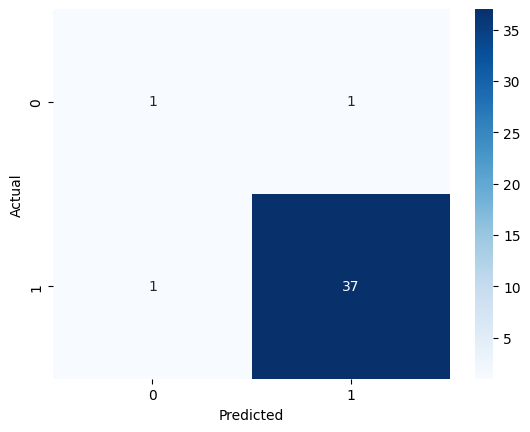

Confusion matrix for MLP with ReLU activation function


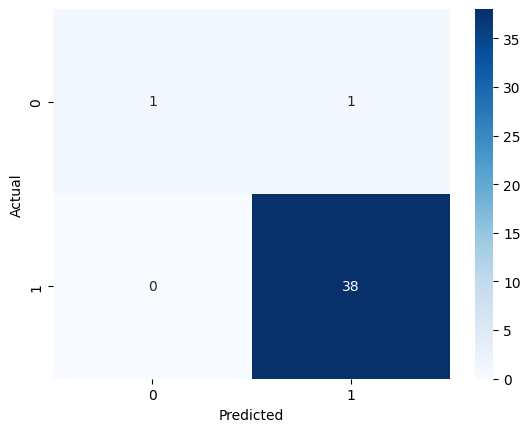

Confusion matrix for MLP with sigmoid activation function


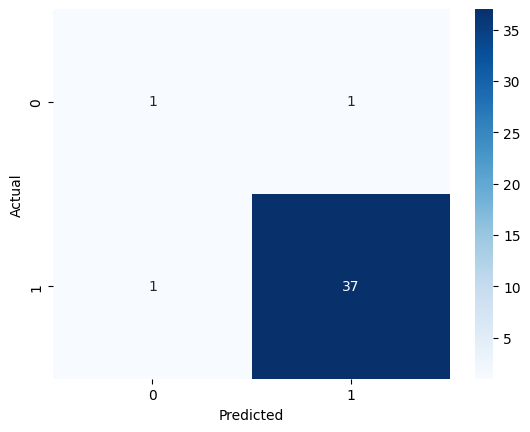

In [20]:
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion matrix for logistic regression model")
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Confusion matrix for MLP with ReLU activation function")
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Confusion matrix for MLP with sigmoid activation function")
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Confusion matrix for logistic regression model

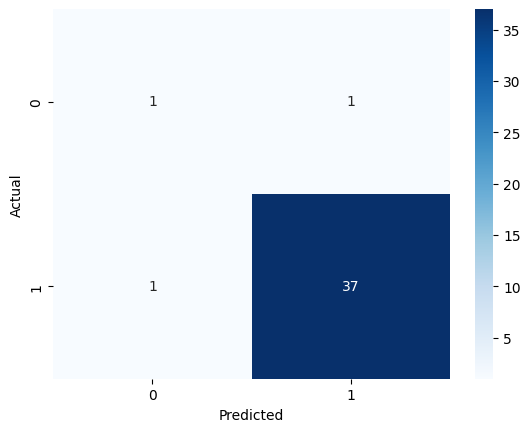

Confusion matrix for MLP with ReLU activation function

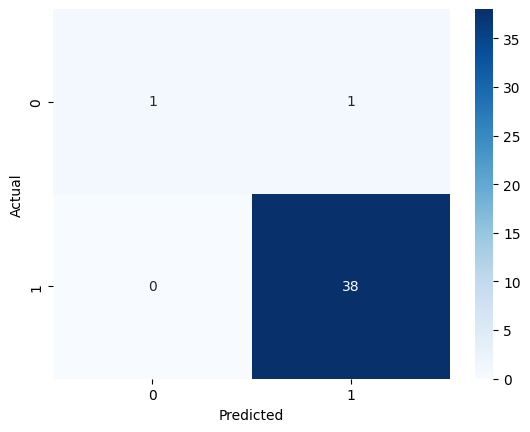

Confusion matrix for MLP with sigmoid activation function

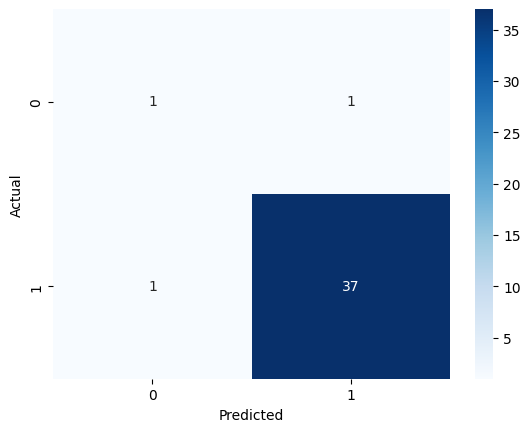

From the perormance metrics, the accuracy, precision, recall and F1-score, we can see that the logistic regression model performs reasonably good as it is one of the funadamental models used for binary classification problems just like the one we have used it for.

The neural netowrk with the ReLU activation function works best and gives the most accurate predictions. It works better than the logistic regression model because logistic regression is a linear model best suited for datasets with linear relationshhips. However, the neural network demonstrates the complex non linear relationship in the data in a better way.

The volatility has an important effect on the predictions. The logistic regression model makes 2 incorrect predictions and both of them were cases of high volatility. Due to the high volatility, there are cases when the price does not follow the current trend and makes rapid unpredictable changes. The neural network also makes 1-2 wrong predictions in cases of high volatility.

Trend continuation helps the model to determine whether the prices will follow the same trend as they have been following or not. So, it plays an important role.

We can see that the model only fails in cases of high volatility because the prices follow unpredictable rapid trends which are difficult to predict.